In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from pandas.tseries.offsets import Week, Hour, Minute

from convert_to_time_series import TimeSeriesData


%matplotlib inline
plt.style.use('ggplot')

In [287]:
path = '../data/lemon_haze_18.csv'
test_path = '../data/test_shard.csv'

In [288]:
lemon_haze = TimeSeriesData(path)

In [289]:
%time lemon_haze.construct_tables()

CPU times: user 105 ms, sys: 24.5 ms, total: 129 ms
Wall time: 130 ms


In [291]:
raw = lemon_haze.raw_df
inv = lemon_haze.by_inv_id
ts = lemon_haze.time_series
sales_dy = lemon_haze.sales_daily
sales_wk = lemon_haze.sales_weekly
gross_dy = lemon_haze.gross_daily
gross_wk = lemon_haze.gross_weekly

In [295]:
gross_wk.index[:7]

DatetimeIndex(['2014-07-21', '2014-07-28', '2014-08-04', '2014-08-11',
               '2014-08-18', '2014-08-25', '2014-09-01'],
              dtype='datetime64[ns]', freq='W-MON')

In [6]:
ts.describe()

,ttl_sales,ttl_gross_profit
count,1112.000000,1112.000000
mean,1620.733130,827.516971
std,1408.668914,871.934455
min,28.815603,-6224.918215
25%,497.311312,265.922448
50%,1479.852908,780.513933
75%,2366.044298,1182.099121
max,15165.420750,10259.691156


In [86]:
ts.tail(10)

,ttl_sales,ttl_gross_profit
2017-07-23,3410.704638,938.039914
2017-07-24,2981.047628,-1083.801338
2017-07-25,3148.211321,383.704697
2017-07-26,2965.299834,-455.184337
2017-07-27,3403.526947,-648.033213
2017-07-28,3305.245627,-590.678973
2017-07-29,3284.180748,-1387.474154
2017-07-30,2912.629785,-2057.399286
2017-07-31,2876.847303,-4978.599530
2017-08-01,1825.069845,-6224.918215


In [57]:
ts.loc['2014-07-20']

ttl_sales           354.418997
ttl_gross_profit    249.073602
Name: 2014-07-20 00:00:00, dtype: float64

In [38]:
sales = pd.Series(ts['ttl_sales'])

In [51]:
sales['7/20/2014']

354.41899671052636

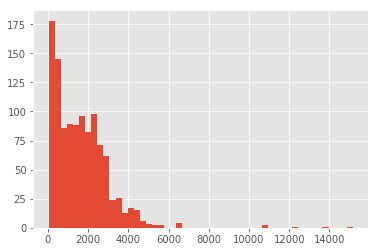

In [372]:
plt.hist(ts['ttl_sales'], bins=50)
plt.show()

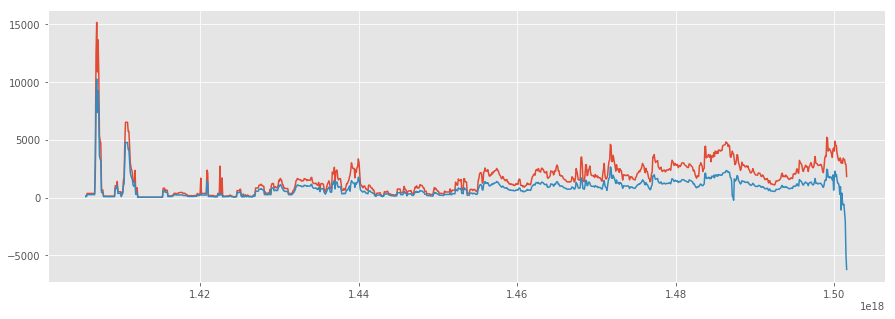

In [379]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(ts.index, ts['ttl_sales'])
plt.plot(ts.index, ts['ttl_gross_profit'])
plt.show()

In [58]:
inv.head()

,wa_inventory_id,generic_strain_id,first_rtl_sale,latest_rtl_sale,days_sales,wholesale_cogs,ttl_rtl_sales,gross_profit,avg_daily_sales,avg_daily_gross,units_sold
0,6033240110000277,18,2014-07-17,2014-09-19,64 days,2700.0,7740.50,5040.50,120.945312,78.757812,150
1,6033240110000284,18,2014-07-19,2014-08-07,19 days,1200.0,4436.00,3236.00,233.473684,170.315789,100
2,6033240110000315,18,2014-08-02,2014-08-04,2 days,1760.0,5535.00,3775.00,2767.500000,1887.500000,100
3,6033240110000316,18,2014-08-01,2014-08-03,2 days,1760.0,5501.87,3741.87,2750.935000,1870.935000,100
4,6033240110000330,18,2014-08-01,2014-08-02,1 days,1760.0,5360.15,3600.15,5360.150000,3600.150000,100


In [87]:
week_index = pd.period_range(ts.index.min(), ts.index.max(), freq='W-MON')

In [88]:
week_index

PeriodIndex(['2014-07-15/2014-07-21', '2014-07-22/2014-07-28',
             '2014-07-29/2014-08-04', '2014-08-05/2014-08-11',
             '2014-08-12/2014-08-18', '2014-08-19/2014-08-25',
             '2014-08-26/2014-09-01', '2014-09-02/2014-09-08',
             '2014-09-09/2014-09-15', '2014-09-16/2014-09-22',
             ...
             '2017-05-30/2017-06-05', '2017-06-06/2017-06-12',
             '2017-06-13/2017-06-19', '2017-06-20/2017-06-26',
             '2017-06-27/2017-07-03', '2017-07-04/2017-07-10',
             '2017-07-11/2017-07-17', '2017-07-18/2017-07-24',
             '2017-07-25/2017-07-31', '2017-08-01/2017-08-07'],
            dtype='period[W-MON]', length=160, freq='W-MON')

Aggregate daily values into weekly sums

In [89]:
weekly = ts.resample('W-MON').sum()

In [117]:
weekly.head()

,ttl_sales,ttl_gross_profit
2014-07-21,1305.147615,904.736431
2014-07-28,2480.932977,1743.515214
2014-08-04,56244.213172,38105.160127
2014-08-11,27806.589799,18836.054697
2014-08-18,846.617188,551.304688


In [122]:
weekly.index.shape

(160,)

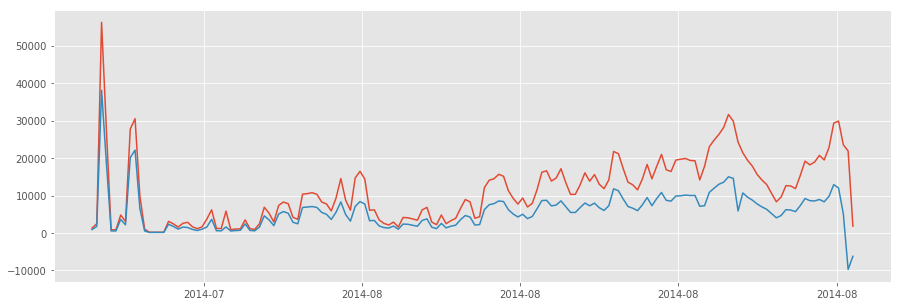

In [108]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(weekly.index, weekly['ttl_sales'])
plt.plot(weekly.index, weekly['ttl_gross_profit'])
ax.xaxis.set_ticklabels(weekly.index.strftime('%Y-%m'))
plt.show()

In [ ]:
x = [x.week for x in weekly.index[50:131]]
x2 = weekly.index
y = weekly['ttl_sales'][50:131]
y2 = weekly['ttl_sales']

In [156]:
sales_series = pd.Series(weekly['ttl_sales'], index=weekly.index)

In [174]:
sales_series.shape

(160,)

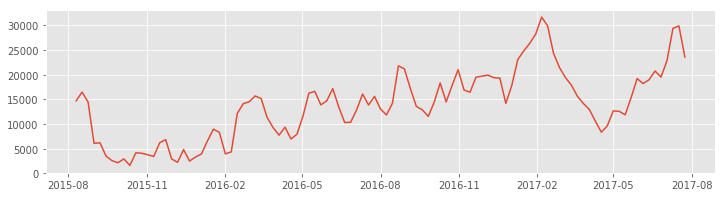

In [188]:
fig = plt.figure(figsize=(12,3))
plt.plot(x, y)

(array([ 735811.,  735903.,  735995.,  736085.,  736177.,  736269.,
         736361.,  736450.,  736542.]), <a list of 9 Text xticklabel objects>)

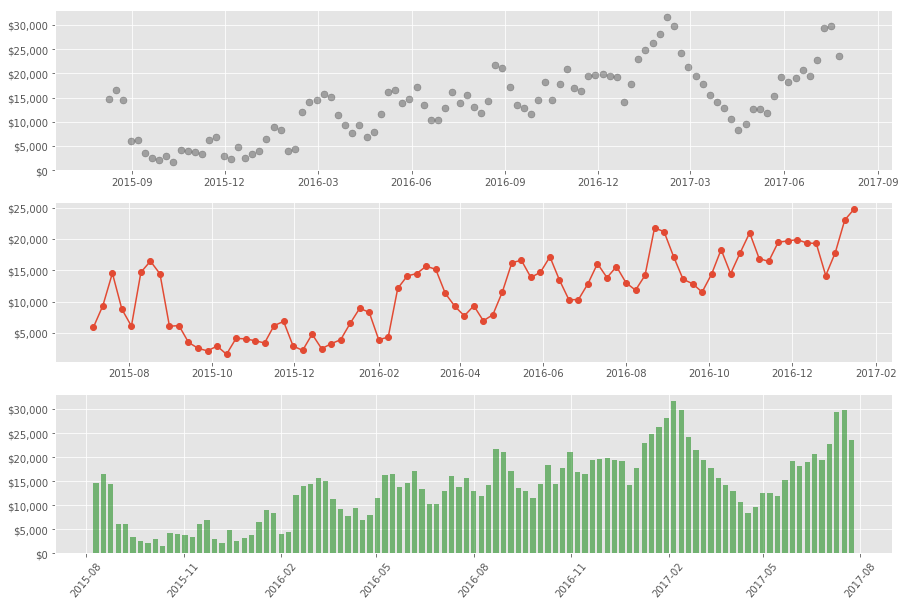

In [200]:
fig, axs = plt.subplots(3, figsize=(15,10))

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

axs[0].scatter(x, y, color='black', s=50, alpha=0.3)
axs[0].yaxis.set_major_formatter(tick)
axs[0].xaxis.set_

axs[1].plot(weekly.index[50:131].to_pydatetime(), weekly['ttl_sales'][50:131], marker='o')
axs[1].yaxis.set_major_formatter(tick)
plt.xticks(rotation=50)

axs[2].bar(x, y, width=5, color='green', alpha=0.5)
axs[2].yaxis.set_major_formatter(tick)
plt.xticks(rotation=50)

In [379]:
x = sales_wk[-107:-3] # 104 weeks of data
index = pd.to_datetime(sales_wk.index[-107:-3])
tick_period = pd.date_range(x.index.min(), x.index.max(), freq='QS-JAN')
tick_period_labels = tick_period.strftime('%Y-%b')

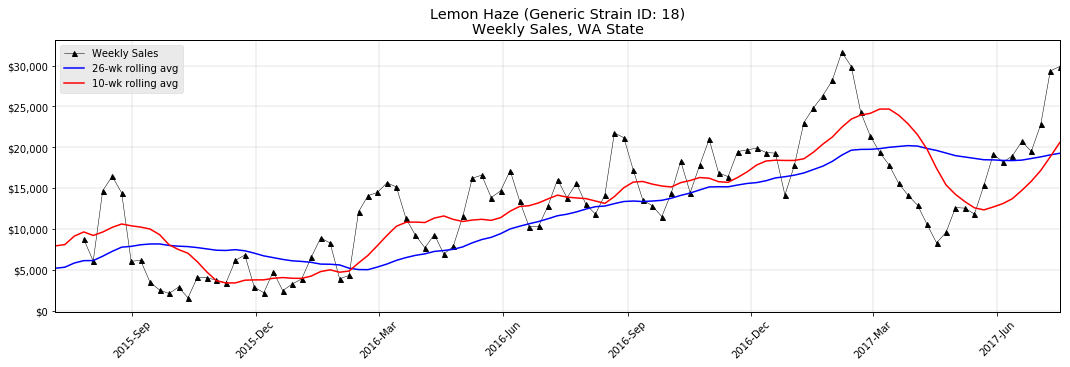

In [406]:
fig, ax = plt.subplots(figsize=(18, 5))

fmt_y = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt_y)
ax.plot(index, sales_wk[-107:-3], color='black', marker='^', ms=5, linewidth=0.5, label='Weekly Sales')
ax.plot(sales_wk.rolling(26).mean(), color='blue', label='26-wk rolling avg')
ax.plot(sales_wk.rolling(10).mean(), color='red', label='10-wk rolling avg')
ax.yaxis.set_major_formatter(tick)
# ax.set_xticks(tick_period.to_pydatetime())

ax.set_facecolor('white')
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.set_xlim(index.min() - 3, index.max())
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(colors='black')

ax.set_title('Lemon Haze (Generic Strain ID: 18)\nWeekly Sales, WA State')
plt.xticks(rotation=45)
plt.legend()
plt.show()